# 0.0 IMPORTS

In [1]:
import seaborn as sns
import pandas as pd
import requests as r
import plotly.express as px
import ipywidgets as widgets

from ipywidgets import fixed
import inflection
import datetime 

from geopy.geocoders         import Nominatim
from IPython.core.display    import HTML

## 0.1 Helper Functions

In [2]:
def jupyter_settings(): 
    %matplotlib inline 
    %pylab inline
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [24, 20]
    plt.rcParams['font.size'] = 24
    display( HTML( '<style>.container { width:100% !important; }</style>') ) 
    pd.options.display.max_columns = None
    pd.options.display.max_rows = 1000
    pd.set_option( 'display.expand_frame_repr', False ) 
    sns.set()

In [3]:
jupyter_settings()

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


## 0.2 Loading Data

In [4]:
df_raw = pd.read_csv('data/kc_house_data.csv')

In [5]:
df_raw

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


# 1.0 DATA DESCRIPTION

In [6]:
df1 = df_raw.copy()

## 1.1 Rename Columns

In [7]:
cols_old = df1.columns.values

snakecase = lambda x: inflection.underscore(x)

cols_new = list(map (snakecase, cols_old))

#rename
df1.columns = cols_new

## 1.2 Data Dimensions

In [8]:
print('Number of Rows: {}'.format(df1.shape[0]))
print('Number of Columns: {}'.format(df1.shape[1]))

Number of Rows: 21613
Number of Columns: 21


## 1.3 Check NA 

In [9]:
df1.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

## 1.4 Check Data Types

In [10]:
df1.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

## 1.5 Change Type

In [11]:
df1['date'] = pd.to_datetime(df1['date'])

## 1.6 Descriptive Statistics

In [12]:
num_attributes = df1.select_dtypes(include=['int64', 'float64'])
cat_attributes = df1.select_dtypes(exclude=['int64', 'float64', 'datetime64[ns]'])

## 1.7 Numerical Attributes

In [13]:
# Central Tendency - mean, meadina
ct1 = pd.DataFrame( num_attributes.apply( np.mean ) ).T
ct2 = pd.DataFrame( num_attributes.apply( np.median ) ).T
# dispersion - std, min, max, range, skew, kurtosis
d1 = pd.DataFrame( num_attributes.apply( np.std ) ).T
d2 = pd.DataFrame( num_attributes.apply( min ) ).T
d3 = pd.DataFrame( num_attributes.apply( max ) ).T
d4 = pd.DataFrame( num_attributes.apply( lambda x: x.max() - x.min() ) ).T
d5 = pd.DataFrame( num_attributes.apply( lambda x: x.skew() ) ).T
d6 = pd.DataFrame( num_attributes.apply( lambda x: x.kurtosis() ) ).T

# concatenar
m = pd.concat( [d2, d3, d4, ct1, ct2, d1, d5, d6] ).T.reset_index()
m.columns = ['attributes', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis']
m

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,id,1.000102e+06,9.900000e+09,9.899000e+09,4.580302e+09,3.904930e+09,2.876499e+09,0.243329,-1.260542
1,price,7.500000e+04,7.700000e+06,7.625000e+06,5.400881e+05,4.500000e+05,3.671187e+05,4.024069,34.585540
2,bedrooms,0.000000e+00,3.300000e+01,3.300000e+01,3.370842e+00,3.000000e+00,9.300403e-01,1.974300,49.063653
3,bathrooms,0.000000e+00,8.000000e+00,8.000000e+00,2.114757e+00,2.250000e+00,7.701453e-01,0.511108,1.279902
4,sqft_living,2.900000e+02,1.354000e+04,1.325000e+04,2.079900e+03,1.910000e+03,9.184196e+02,1.471555,5.243093
5,sqft_lot,5.200000e+02,1.651359e+06,1.650839e+06,1.510697e+04,7.618000e+03,4.141955e+04,13.060019,285.077820
6,floors,1.000000e+00,3.500000e+00,2.500000e+00,1.494309e+00,1.500000e+00,5.399764e-01,0.616177,-0.484723
7,waterfront,0.000000e+00,1.000000e+00,1.000000e+00,7.541757e-03,0.000000e+00,8.651520e-02,11.385108,127.632494
8,view,0.000000e+00,4.000000e+00,4.000000e+00,2.343034e-01,0.000000e+00,7.662998e-01,3.395750,10.893022
9,condition,1.000000e+00,5.000000e+00,4.000000e+00,3.409430e+00,3.000000e+00,6.507280e-01,1.032805,0.525764


## 1.8 Categorical Attributes

# 2.0 FEATURE ENGINEERING

In [196]:
df2 = df1.copy()

## 2.1 Mapa Mental de Hipoteses

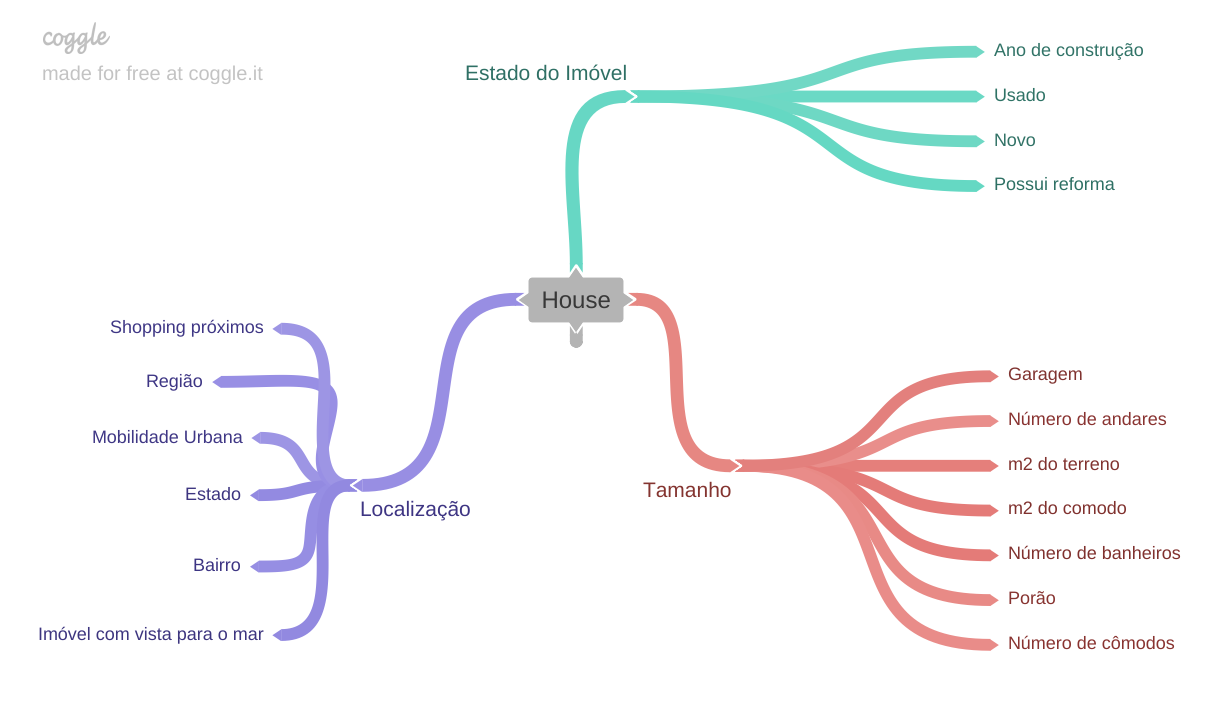

In [373]:
from IPython.core.display    import Image
Image('img/MindMapHipothesis.png')

## 2.2 Hipotese Tamanho

**H1**. Imóveis deveriam ser mais caros de acordo com a quantidade de andares.

**H2**. Imóveis deveriam ser mais caros de acordo com a quantidade de banheiros.

**H3**. Imóveis que possuem porão deveriam ser mais caros.

**H4**. Imóveis deveriam ser mais caros de acordo com a capacidade de automoveis da garagem.

## 2.3 Hipotese Localização

**H1**. Imóveis deveriam ser mais caros de acordo com a cidade.

**H2**. Imóveis deveriam ser mais caros de acordo com o bairro.

**H3**. Imóveis deveriam ser mais caros de acordo com a região.

**H4**. Imóveis deveriam ser mais caros se possuirem shopping próximos.

**H5**. Vista para o mar deveria aumentar o valor do imóvel em 10%.

## 2.4 Hipotese Estado do Imóvel

**H1**. Quanto mais velho o imóvel mais caro ele deveria ser.

**H2**. Imóveis que foram reformados são mais baratos.

**H3**. Imóveis novos não são mais caros que os imoveis antigos

## 2.5 Lista Final de Hipóteses

**H1**. Imóveis deveriam ser mais caros de acordo com a quantidade de andares.

**H2**. Imóveis deveriam ser mais caros de acordo com a quantidade de banheiros.

**H3**. Imóveis que possuem porão deveriam ser mais caros.

**H4**. Imóveis deveriam ser mais caros de acordo com a capacidade de automoveis da garagem.

**H5**. Imóveis deveriam ser mais caros de acordo com a cidade.

**H6**. Imóveis deveriam ser mais caros de acordo com o bairro.

**H7**. Imóveis deveriam ser mais caros de acordo com a região.

**H8**. Imóveis deveriam ser mais caros se possuirem shopping próximos.

**H9**. Vista para o mar deveria aumentar o valor do imóvel em 10%.

**H10**. Quanto mais velho o imóvel mais caro ele deveria ser.

**H11**. Imóveis que foram reformados são mais baratos.

**H12**. Imóveis novos não são mais caros que os imoveis antigos.

## 2.6 Feature Engeneering

In [197]:
# year
df2['year'] = df2['date'].dt.year

# month
df2['month'] = df2['date'].dt.month

# day
df2['day'] = df2['date'].dt.day

# median price by zipcode
df = df2[['price', 'zipcode']].groupby('zipcode').median().reset_index().rename(columns={'price': 'median_price'})
df2 = df2.merge(df, on='zipcode', how='inner')

# status 
df2['status'] = 0
for i in range(len( df2 ) ):
        if  (df2.loc[i, 'price'] < df2.loc[i, 'median_price']) & (df2.loc[i, 'condition'] >= 2):
             df2.loc[i, 'status'] = 'buy'
        else:
            df2.loc[i, 'status'] = 'not_buy'

# seasonality
df2['seasonality'] = 0
for i in range( len ( df2 ) ):
    if (df2.loc[i, 'month'] >= 1) & (df2.loc[i, 'month'] < 3):
        df2.loc[i, 'seasonality'] = 'winter'
    
    elif (df2.loc[i, 'month'] >= 3) & (df2.loc[i, 'month'] < 6):
        df2.loc[i, 'seasonality'] = 'spring'
     
    elif (df2.loc[i, 'month'] >= 6) & (df2.loc[i, 'month'] < 9):
        df2.loc[i, 'seasonality'] = 'summer'
        
    elif (df2.loc[i, 'month'] >= 9) & (df2.loc[i, 'month'] < 12):
        df2.loc[i, 'seasonality'] = 'autumn'
        
    else:    
        df2.loc[i, 'seasonality'] = 'autumn'

# resale
for i in range ( len ( df2 ) ):
    
    if (df2.loc[i, 'price'] < df2.loc[i, 'median_price']) & (df2.loc[i, 'seasonality'] == 'primavera'):
        df2.loc[i, 'resale_price'] = (0.30 *  df2.loc[i, 'median_price']) + df2.loc[i, 'median_price']
        
    elif (df2.loc[i, 'price'] < df2.loc[i, 'median_price']) & (df2.loc[i, 'seasonality'] == 'verão'):
        df2.loc[i, 'resale_price'] = (0.20 *  df2.loc[i, 'median_price']) + df2.loc[i, 'median_price']
    
    else:
        df2.loc[i, 'resale_price'] = (0.10 *  df2.loc[i, 'median_price']) + df2.loc[i, 'median_price']

# profit
df2['profit'] = df2['resale_price'] - df2['price']


KeyboardInterrupt: 

In [198]:
df2 = pd.read_csv('houserocket_featended.csv')

# define prices
for i in range(len ( df2 ) ):
    if  df2.loc[i, 'price'] <= 321450:
         df2.loc[i, 'level'] = 0
        
    elif (df2.loc[i, 'price'] > 321450) & (df2.loc[i, 'price'] <= 450000 ):
         df2.loc[i, 'level'] = 1
            
    elif (df2.loc[i, 'price'] > 450000) & (df2.loc[i, 'price'] <= 650000 ):
         df2.loc[i, 'level'] = 2

    else:
         df2.loc[i, 'level'] = 3
            
df2['level'] = df2['level'].astype( int )

# is_waterfront
df2['is_waterfront'] = df2['waterfront'].apply(lambda x: 'yes' if x== 1 else 'no')

In [32]:
# create empty rows
df2['road'] = 0
df2['house_number'] = 0
df2['city'] = 0
df2['county'] = 0
df2['state'] = 0

# initialize Nomatim API 
geolocator = Nominatim(user_agent="marcus_bragion")

for i in range ( len ( df2 ) ):
    print( 'Loop {} / {}.'.format( i, len(df2) ) )
    
    # make query
    query = str( df2.loc[i, 'lat']) + ',' + str( df2.loc[i, 'long'])
    
    # API request
    response = geolocator.reverse( query )
    
    if 'road' in response.raw['address']:
        df2.loc[i, 'road']         = response.raw['address']['road']
        
    if 'house_number' in response.raw['address']:
        df2.loc[i, 'house_number'] = response.raw['address']['house_number']
    
    if 'city' in  response.raw['address']:
        df2.loc[i, 'city']         = response.raw['address']['city']
    
    if 'county' in  response.raw['address']:
        df2.loc[i, 'county']       = response.raw['address']['county']
    
    if 'state' in  response.raw['address']:
        df2.loc[i, 'state']        = response.raw['address']['state']

# 3.0 EXPLORATORY DATA ANALYSIS

In [323]:
df3 = df2.copy()

## 3.1 Analise Univariada

## 3.2 Responsable Variable

C:\Users\AMD\anaconda3\envs\houserocket\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='price', ylabel='Density'>

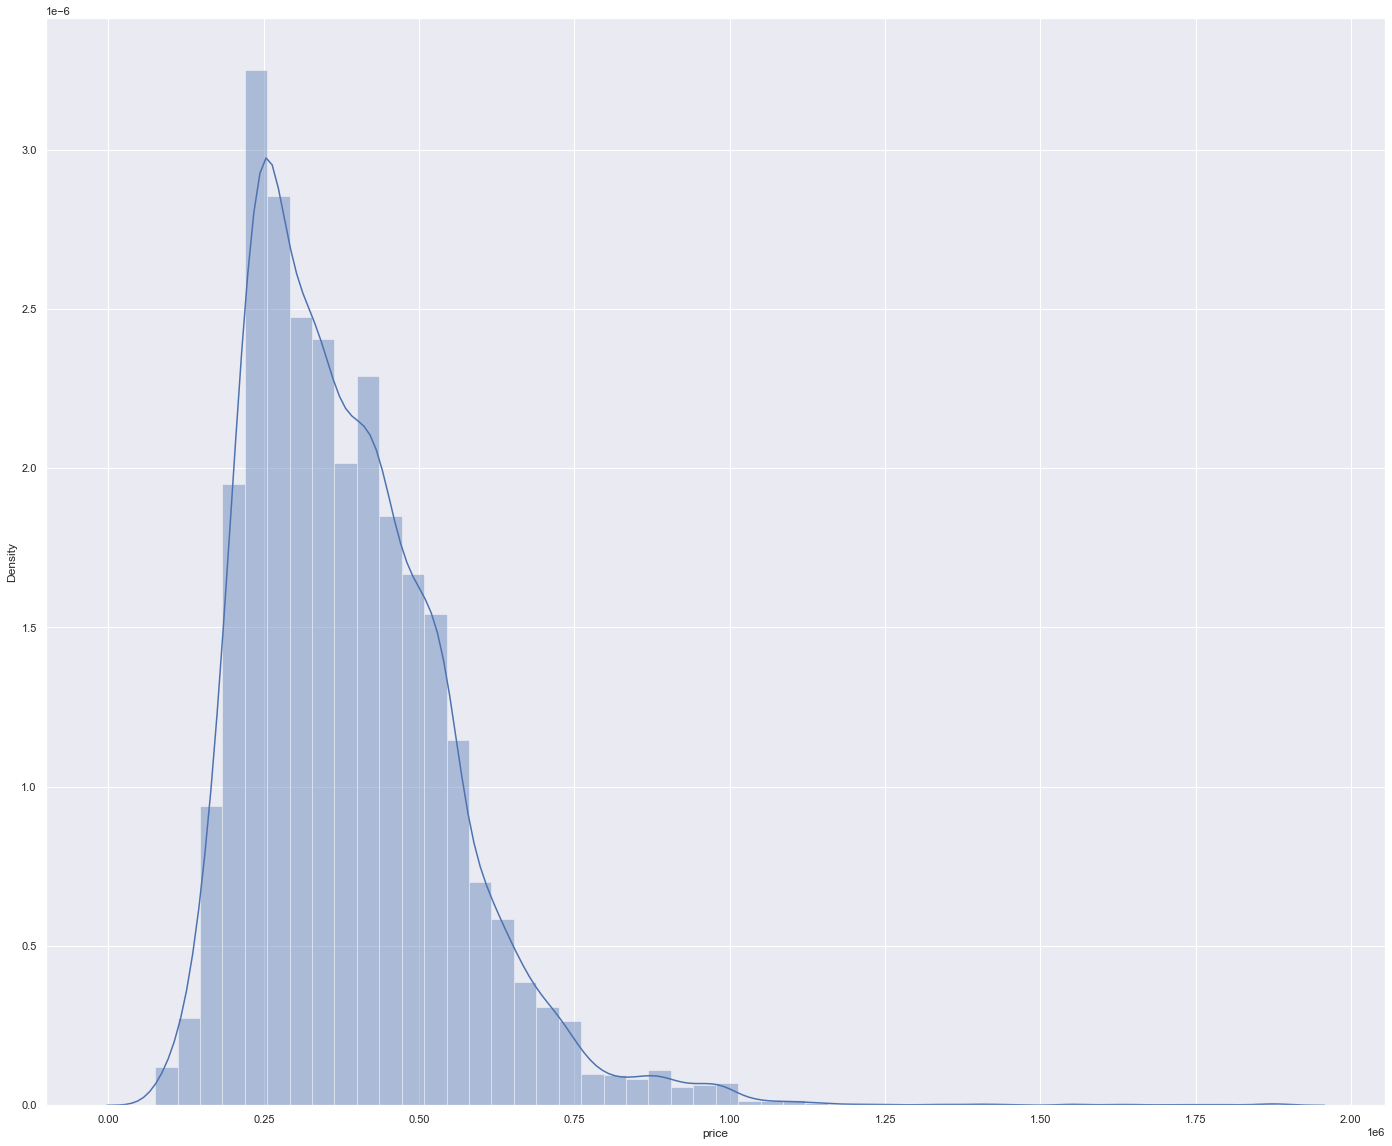

In [52]:
sns.distplot(df4['price'])

## 3.1.2 Numerical Variables

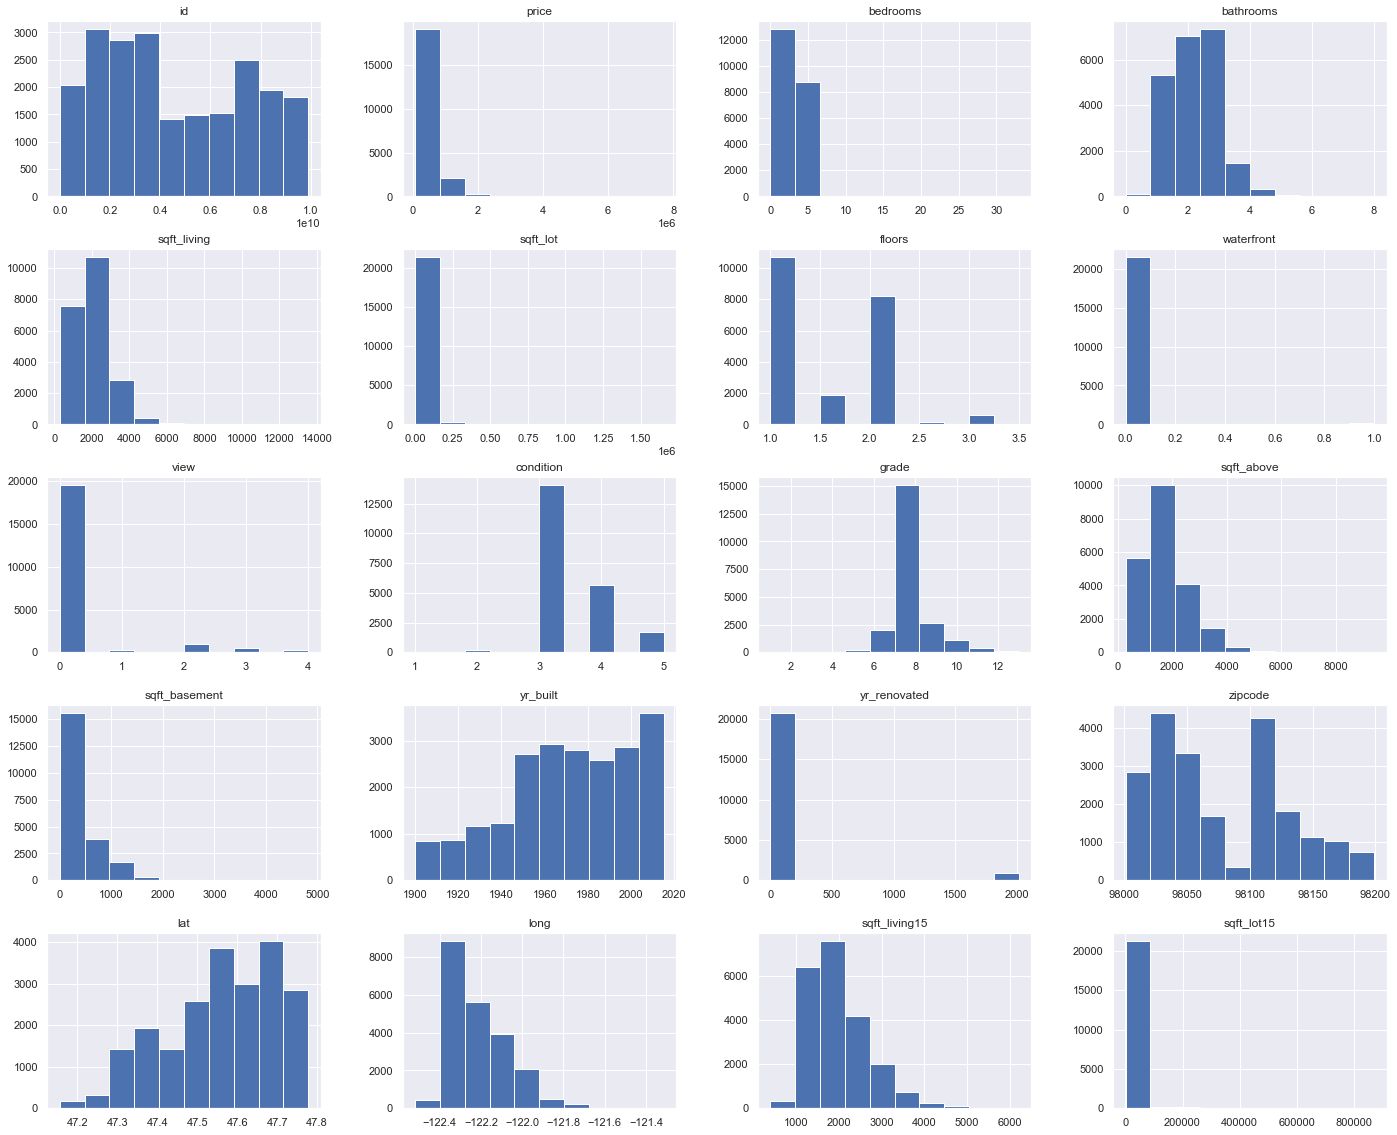

In [53]:
num_attributes.hist();

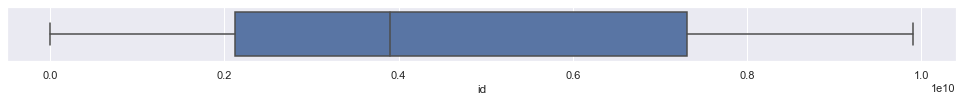

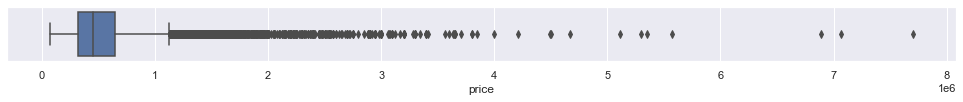

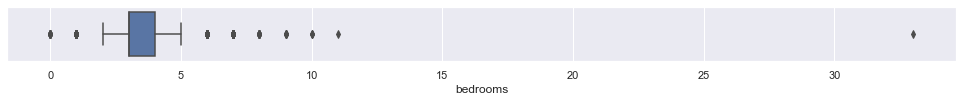

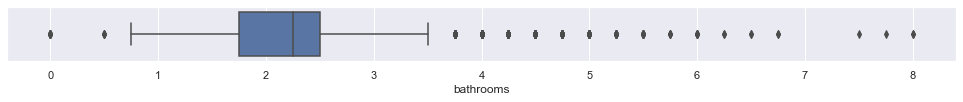

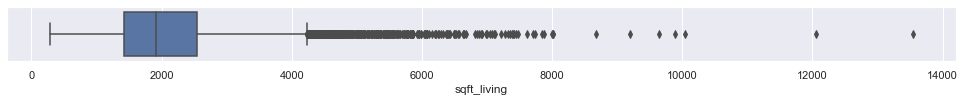

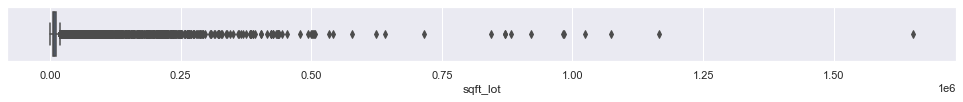

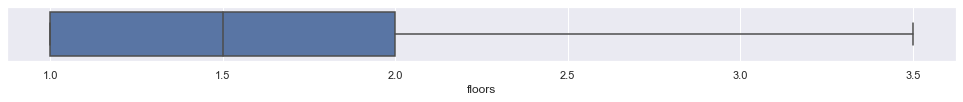

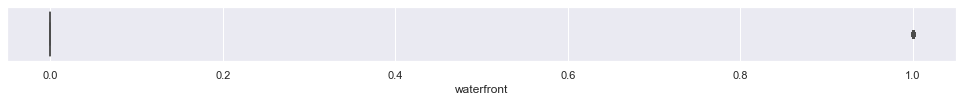

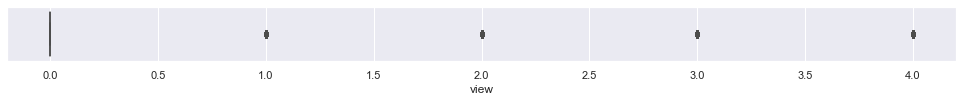

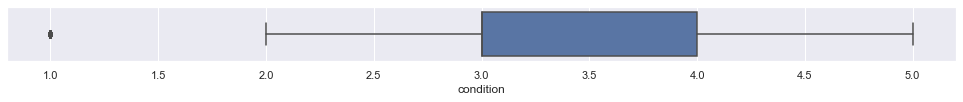

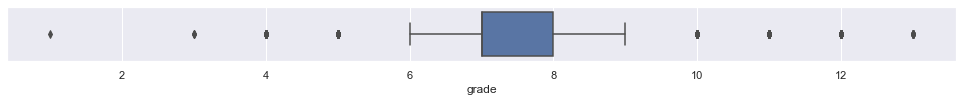

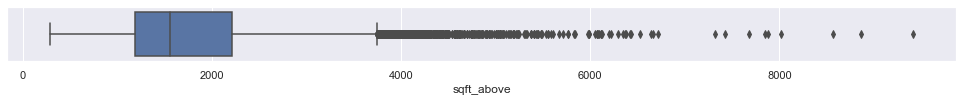

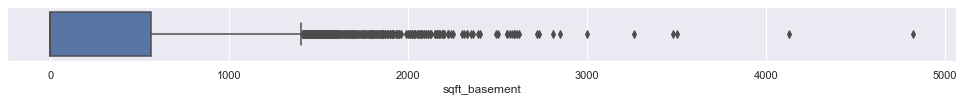

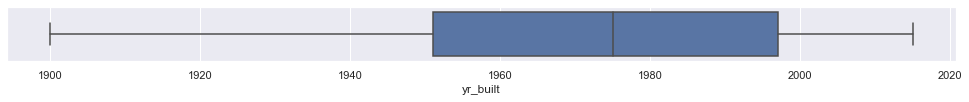

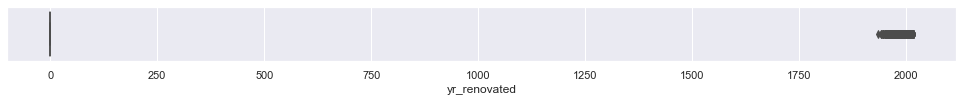

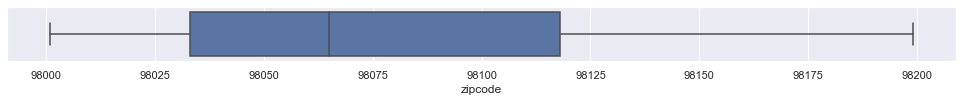

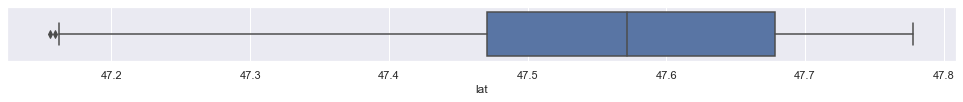

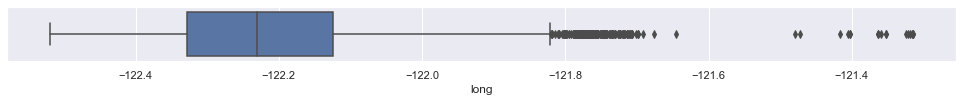

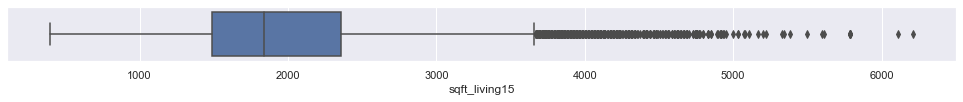

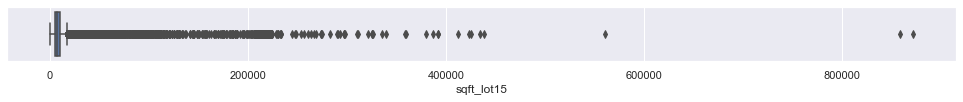

In [262]:
# plot boxplot for each feature
for column in num_attributes:
        plt.figure(figsize=(17,1))
        sns.boxplot(data=num_attributes, x=column)

##  3.1.3 Categorical Variables

In [54]:
df4['status'].drop_duplicates()
df4['seasonality'].drop_duplicates()
df4['road'].drop_duplicates()
df4['house_number'].drop_duplicates()
df4['city'].drop_duplicates()
df4['county'].drop_duplicates()
df4['state'].drop_duplicates()

# stats
plt.subplot(4, 2, 1)
sns.countplot(df4['status']);

# seasonality
plt.subplot(4, 2, 2)
sns.countplot(df4['seasonality']);

# road
plt.subplot(4, 2, 3)
sns.countplot(df4['road']);

# house_number
plt.subplot(4, 2, 4)
sns.countplot(df4['house_number']);

# city
plt.subplot(4, 2, 5)
sns.countplot(df4['city']);

# county
plt.subplot(4, 2, 6)
sns.countplot(df4['county']);

# state
plt.subplot(4, 2, 7)
sns.countplot(df4['state']);

C:\Users\AMD\anaconda3\envs\houserocket\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\AMD\anaconda3\envs\houserocket\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\AMD\anaconda3\envs\houserocket\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\AMD\anaconda3\envs\hou

Error in callback <function flush_figures at 0x000001C1D30B0940> (for post_execute):



KeyboardInterrupt



## 3.2 Analise Bivariada

## **H1**. Preços dos imóveis aumentam mais com o número de andares ao números de banheiros
**VERDADEIRA** Números de banheiros impactam mais o valor ao número de andares

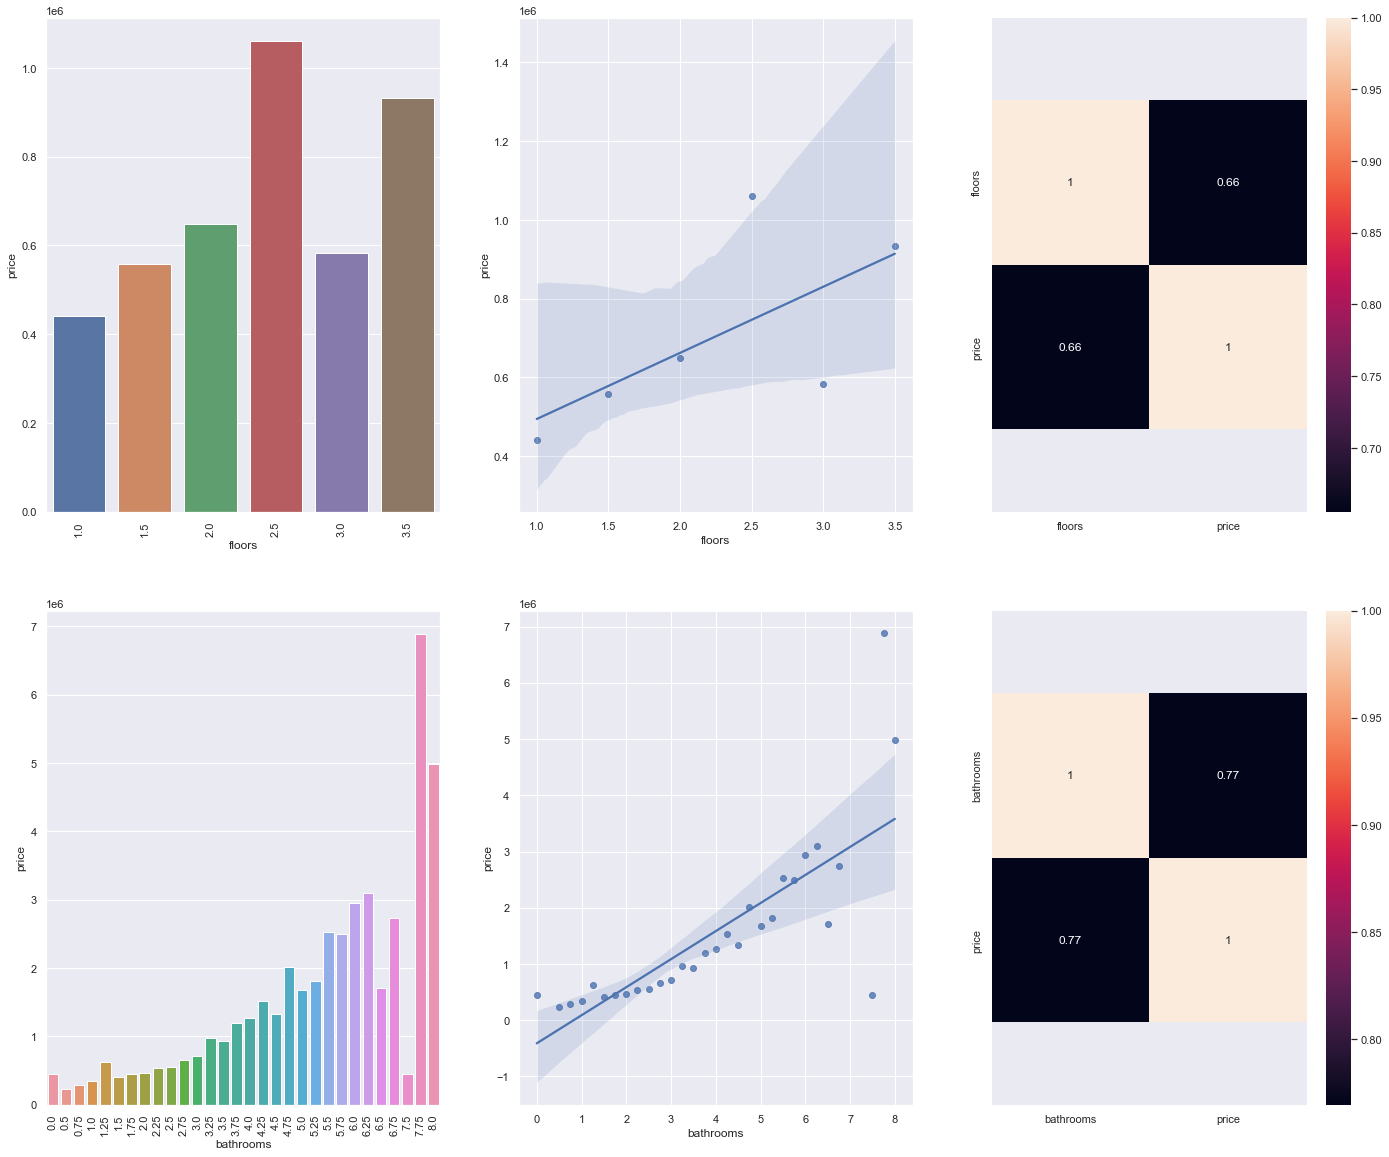

In [266]:
plt.subplot( 2, 3, 1 )
aux1 = df4[['floors', 'price']].groupby('floors').mean().reset_index()
sns.barplot( x='floors', y='price', data=aux1 );
plt.xticks( rotation=90 );

plt.subplot( 2, 3, 2 )
sns.regplot( x='floors', y='price', data=aux1 );

plt.subplot( 2, 3, 3 )
x = sns.heatmap( aux1.corr( method='pearson'), annot=True );
bottom, top = x.get_ylim()
x.set_ylim( bottom+0.5, top-0.5);

plt.subplot( 2, 3, 4 )
aux2 = df4[['bathrooms', 'price']].groupby('bathrooms').mean().reset_index()
sns.barplot( x='bathrooms', y='price', data=aux2 );
plt.xticks( rotation=90 );

plt.subplot( 2, 3, 5 )
sns.regplot( x='bathrooms', y='price', data=aux2 );

plt.subplot( 2, 3, 6 )
x = sns.heatmap( aux2.corr( method='pearson'), annot=True );
bottom, top = x.get_ylim()
x.set_ylim( bottom+0.5, top-0.5);

## **H2**. Preços dos imóveis aumentam mais com o tamanho do porão ao números de andares.
**VERDADEIRA** O tamanho do porão influencia mais o aumento de preço ao número de andares.

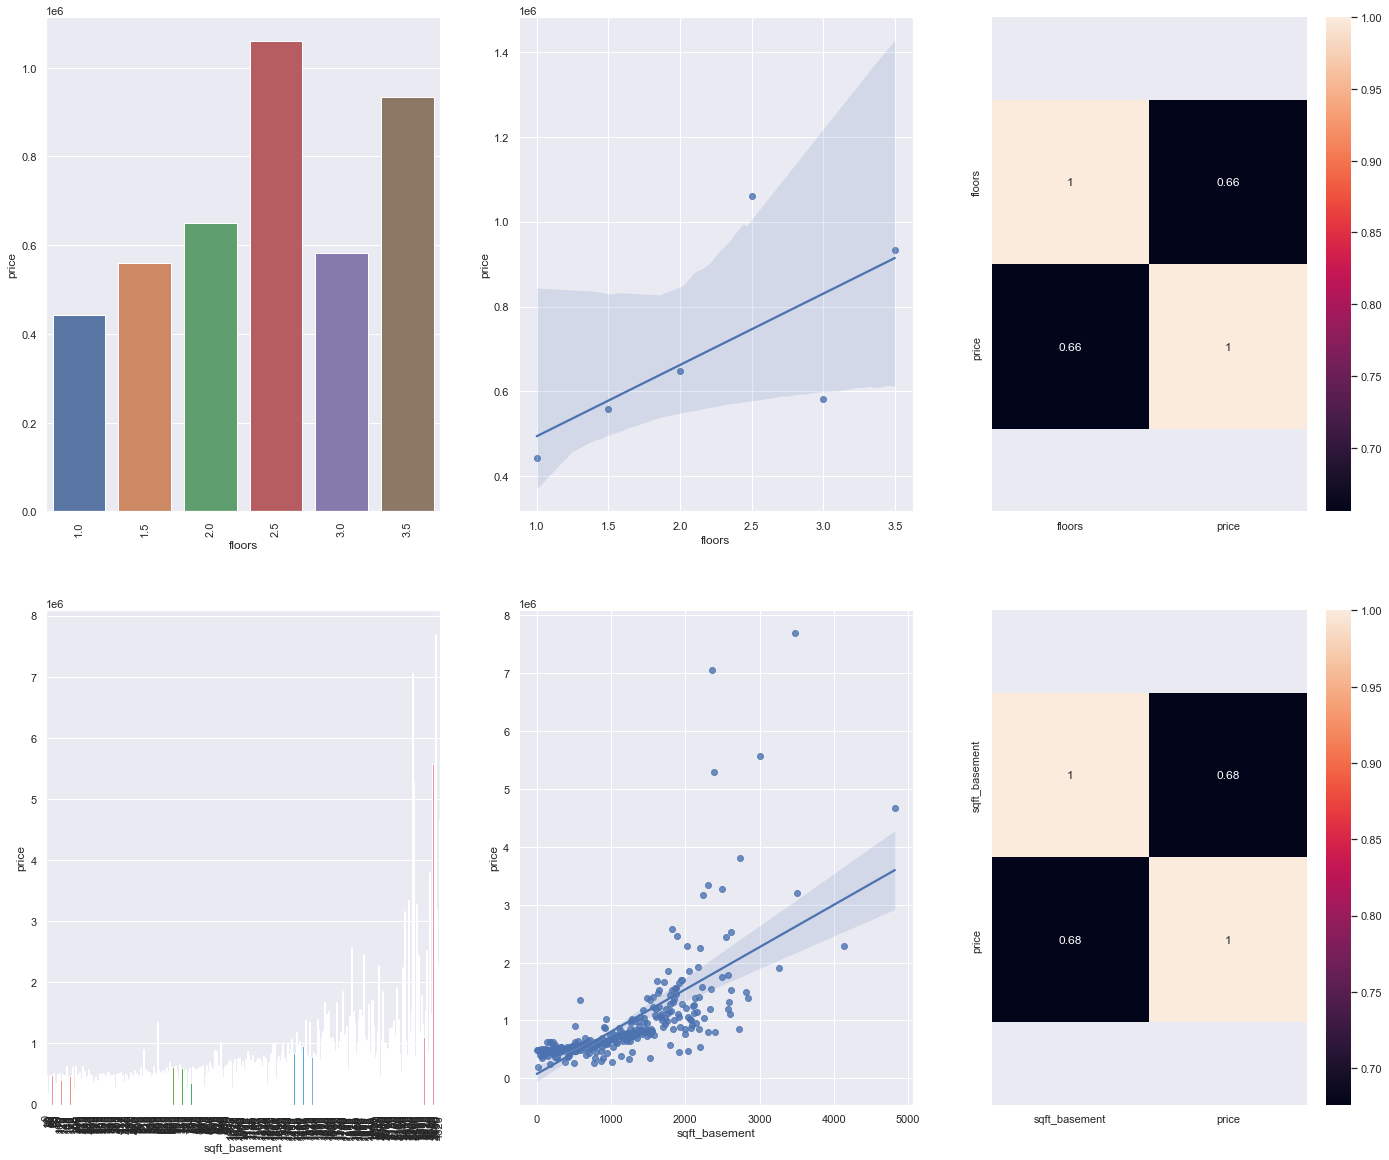

In [268]:
plt.subplot( 2, 3, 1 )
aux1 = df4[['floors', 'price']].groupby('floors').mean().reset_index()
sns.barplot( x='floors', y='price', data=aux1 );
plt.xticks( rotation=90 );

plt.subplot( 2, 3, 2 )
sns.regplot( x='floors', y='price', data=aux1 );

plt.subplot( 2, 3, 3 )
x = sns.heatmap( aux1.corr( method='pearson'), annot=True );
bottom, top = x.get_ylim()
x.set_ylim( bottom+0.5, top-0.5);

plt.subplot( 2, 3, 4 )
aux2 = df4[['sqft_basement', 'price']].groupby('sqft_basement').mean().reset_index()
sns.barplot( x='sqft_basement', y='price', data=aux2 );
plt.xticks( rotation=90 );

plt.subplot( 2, 3, 5 )
sns.regplot( x='sqft_basement', y='price', data=aux2 );

plt.subplot( 2, 3, 6 )
x = sns.heatmap( aux2.corr( method='pearson'), annot=True );
bottom, top = x.get_ylim()
x.set_ylim( bottom+0.5, top-0.5);

## H3. Preços dos imóveis aumentam mais quando possuem vista para o mar ao número de banheiros no imóvel.
**VERDADEIRA** O atributo ''vista para o mar'' impacta mais no preço ao número de banheiros do imóvel.

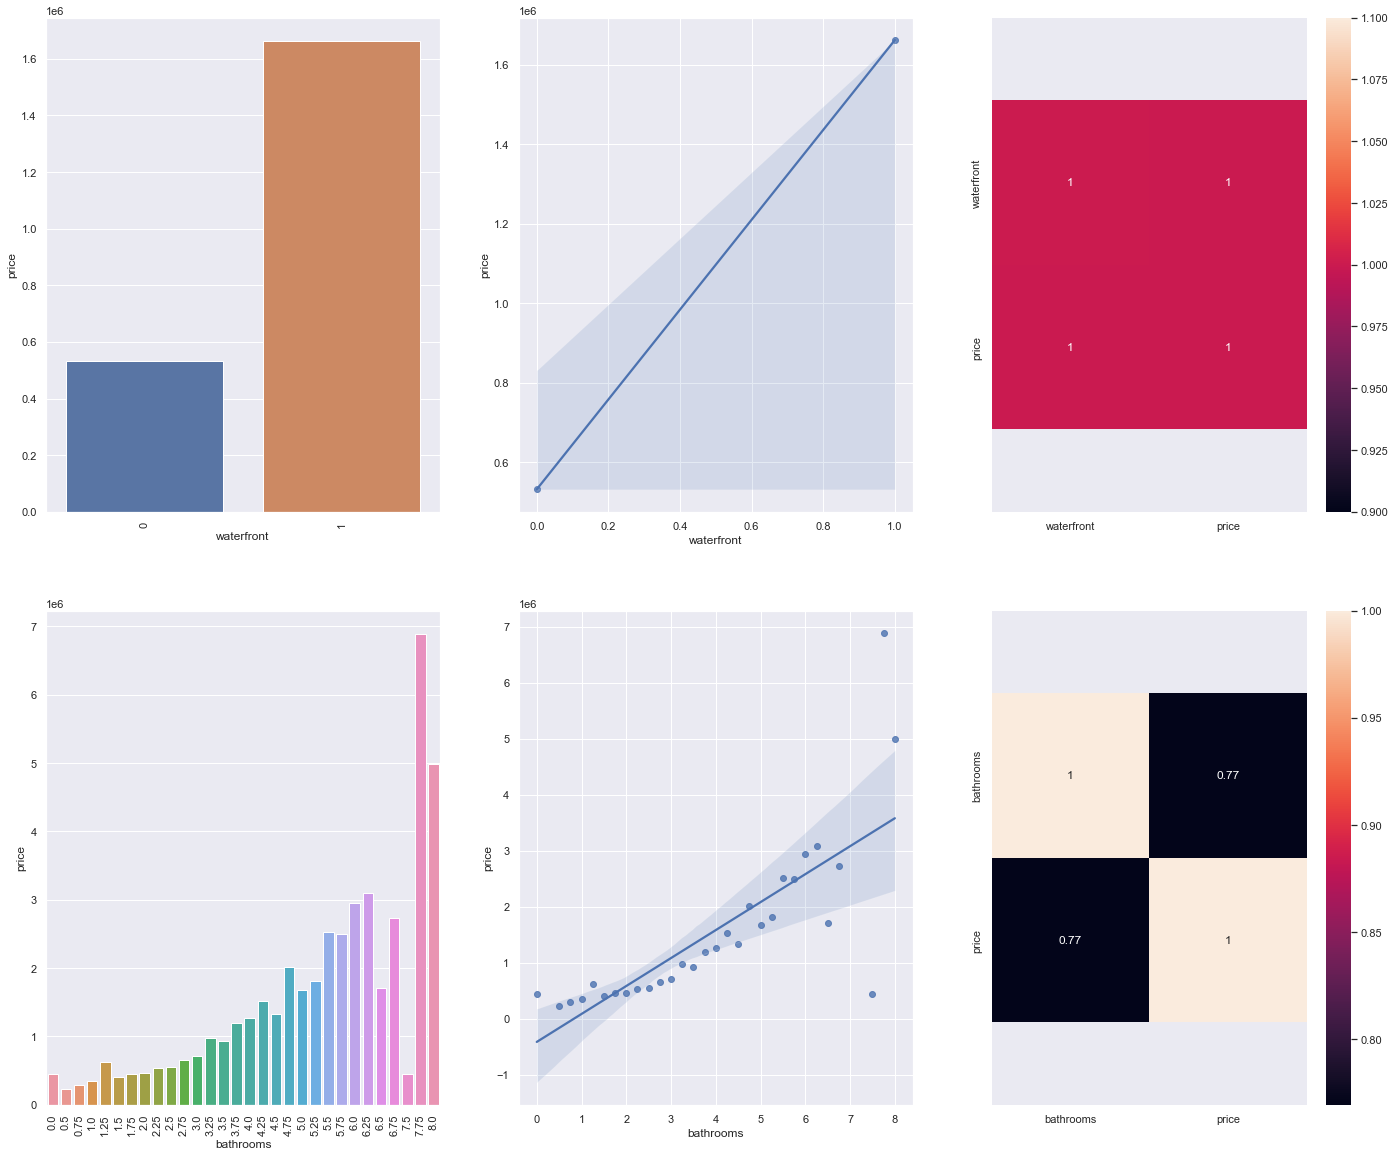

In [269]:
plt.subplot( 2, 3, 1 )
aux1 = df4[['waterfront', 'price']].groupby('waterfront').mean().reset_index()
sns.barplot( x='waterfront', y='price', data=aux1 );
plt.xticks( rotation=90 );

plt.subplot( 2, 3, 2 )
sns.regplot( x='waterfront', y='price', data=aux1 );

plt.subplot( 2, 3, 3 )
x = sns.heatmap( aux1.corr( method='pearson'), annot=True );
bottom, top = x.get_ylim()
x.set_ylim( bottom+0.5, top-0.5);

plt.subplot( 2, 3, 4 )
aux2 = df4[['bathrooms', 'price']].groupby('bathrooms').mean().reset_index()
sns.barplot( x='bathrooms', y='price', data=aux2 );
plt.xticks( rotation=90 );

plt.subplot( 2, 3, 5 )
sns.regplot( x='bathrooms', y='price', data=aux2 );

plt.subplot( 2, 3, 6 )
x = sns.heatmap( aux2.corr( method='pearson'), annot=True );
bottom, top = x.get_ylim()
x.set_ylim( bottom+0.5, top-0.5);

## H4: Imóveis com data de construção menor que 1955 são em média 50% mais baratos.
**FALSA** Imóveis com a data de construção menor que 1955 são em média 1% mais baratos.

C:\Users\AMD\anaconda3\envs\houserocket\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



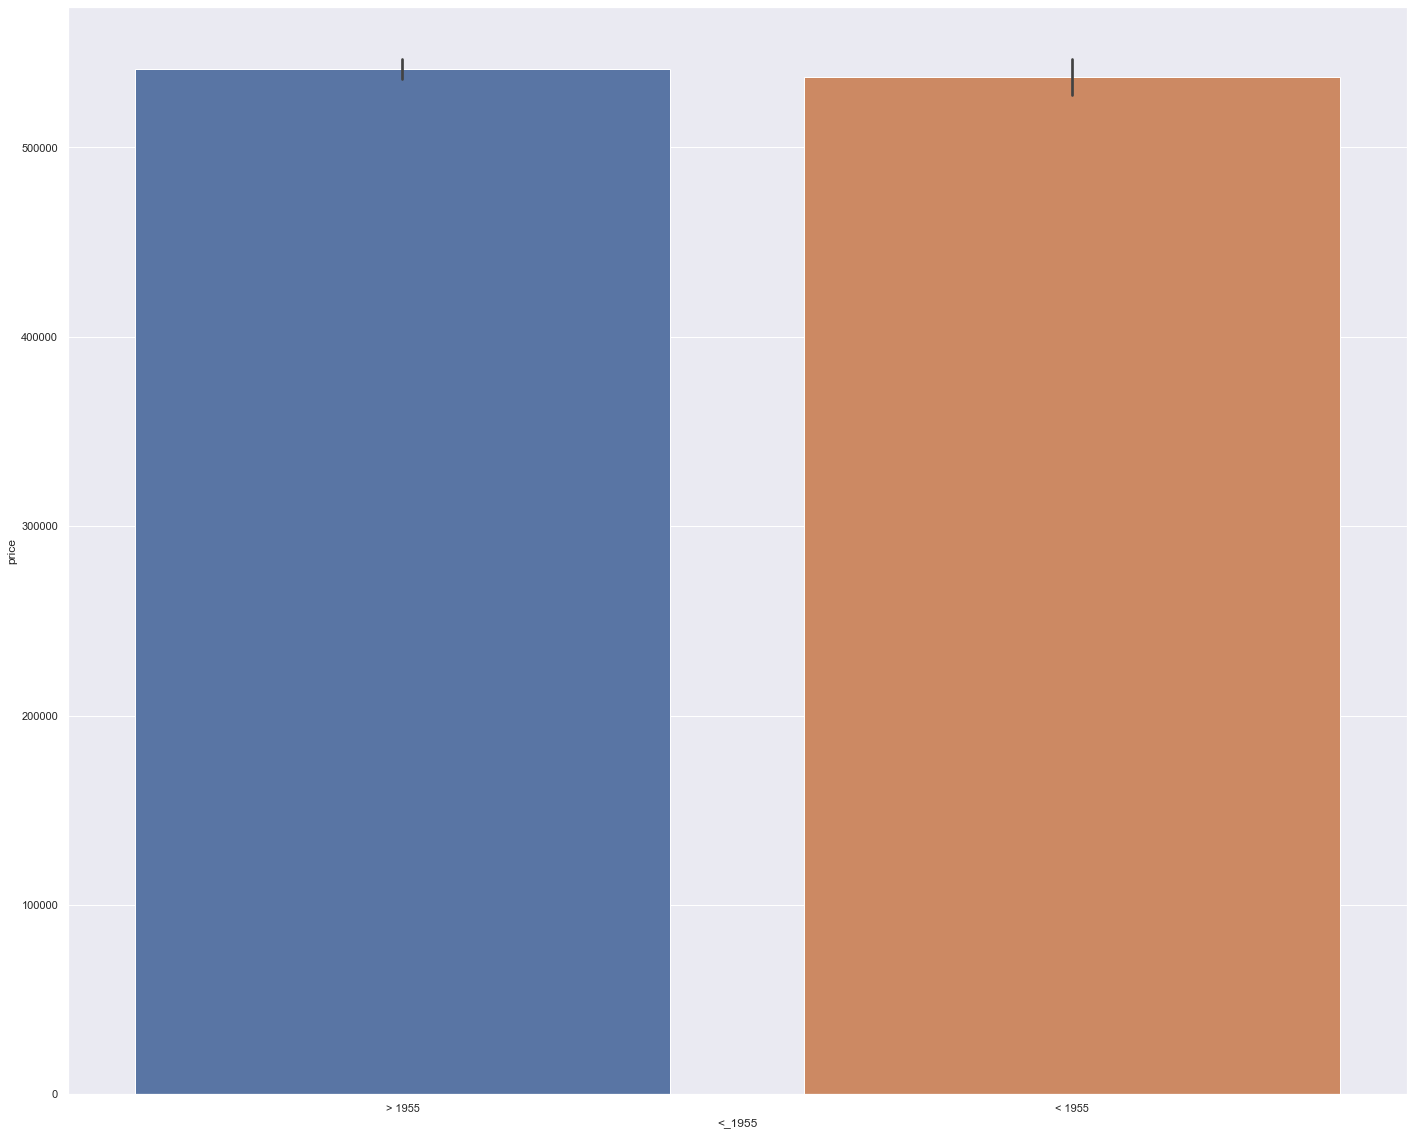

In [298]:
aux1['<_1955'] =  df4['yr_built'].apply(lambda x: '< 1955' if x < 1955 else '> 1955')
aux2 = aux1[['<_1955', 'price']].groupby('<_1955').mean().reset_index()
sns.barplot(aux1['<_1955'], aux1['price'], data=aux2);

## H5: O preço dos imóveis deveriam aumentar cerca de 10% ano após ano (YoY).
**FALSA** O preço dos imóveis caiu em 47% ano após ano (YoY).

<AxesSubplot:xlabel='year', ylabel='price'>

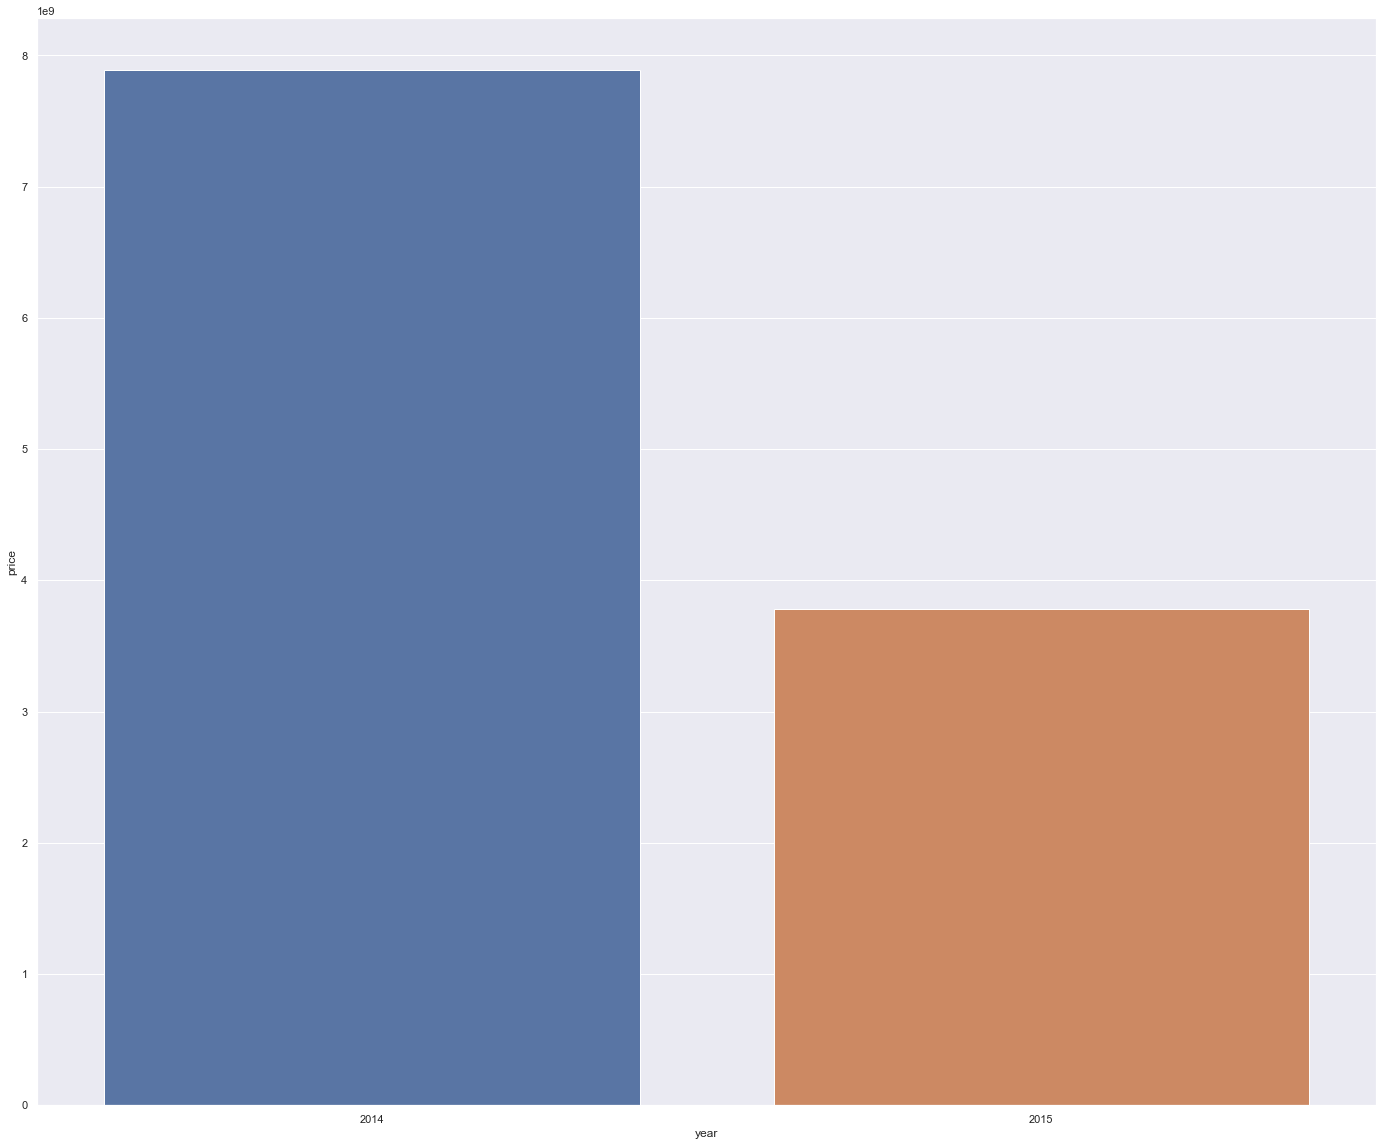

In [304]:
aux1 = df4[['year', 'price']].groupby('year').sum().reset_index()
sns.barplot(x='year', y='price', data=aux1)

## H6: O preço dos imóveis deveriam aumentar mes após mes (MoM).
**VERDADEIRA** O preço dos imóveis aumentam ao passar dos meses.

(2.5, -0.5)

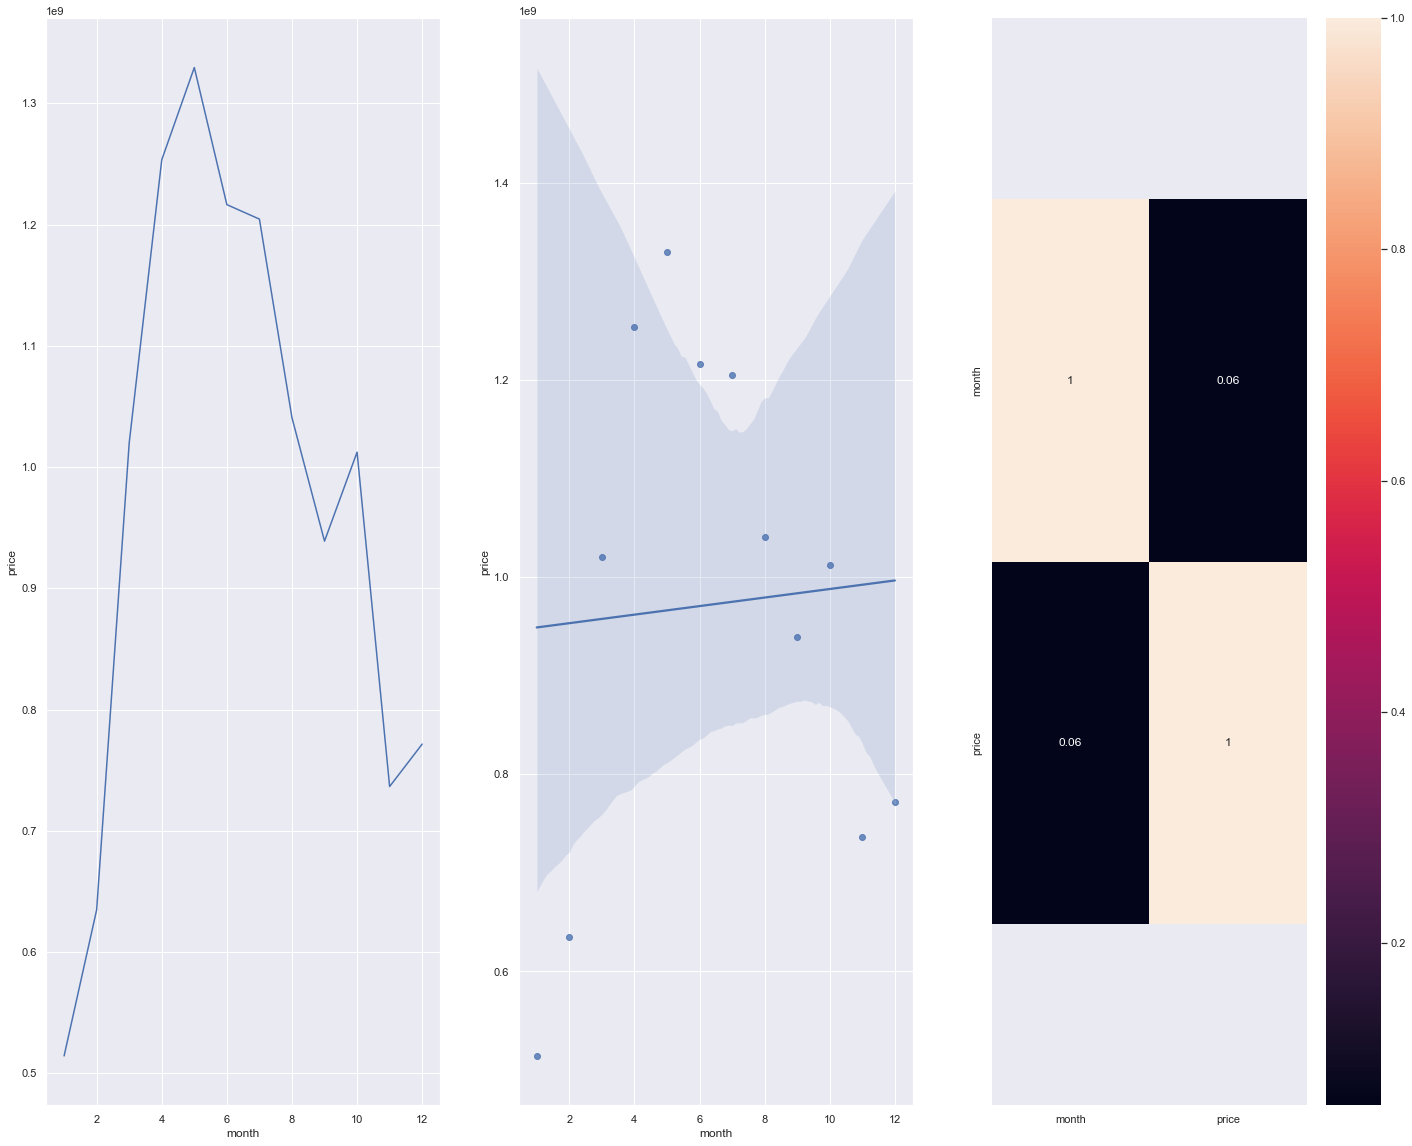

In [318]:
plt.subplot(1, 3, 1)
aux1 = df4[['month', 'price']].groupby('month').sum().reset_index()
sns.lineplot(x='month', y='price', data=aux1)

plt.subplot(1, 3, 2)
sns.regplot(x='month', y='price', data=aux1)

plt.subplot( 1, 3, 3 )
x = sns.heatmap( aux1.corr( method='pearson'), annot=True );
bottom, top = x.get_ylim()
x.set_ylim( bottom+0.5, top-0.5)

## H7: Imóveis em más condições mas com boa vista (view == 1) deveriam ser 10% mais caros.
**FALSA** Imóveis em más condições mas com boa vista (indice 1) são 10% mais baratos,

<AxesSubplot:xlabel='view', ylabel='price'>

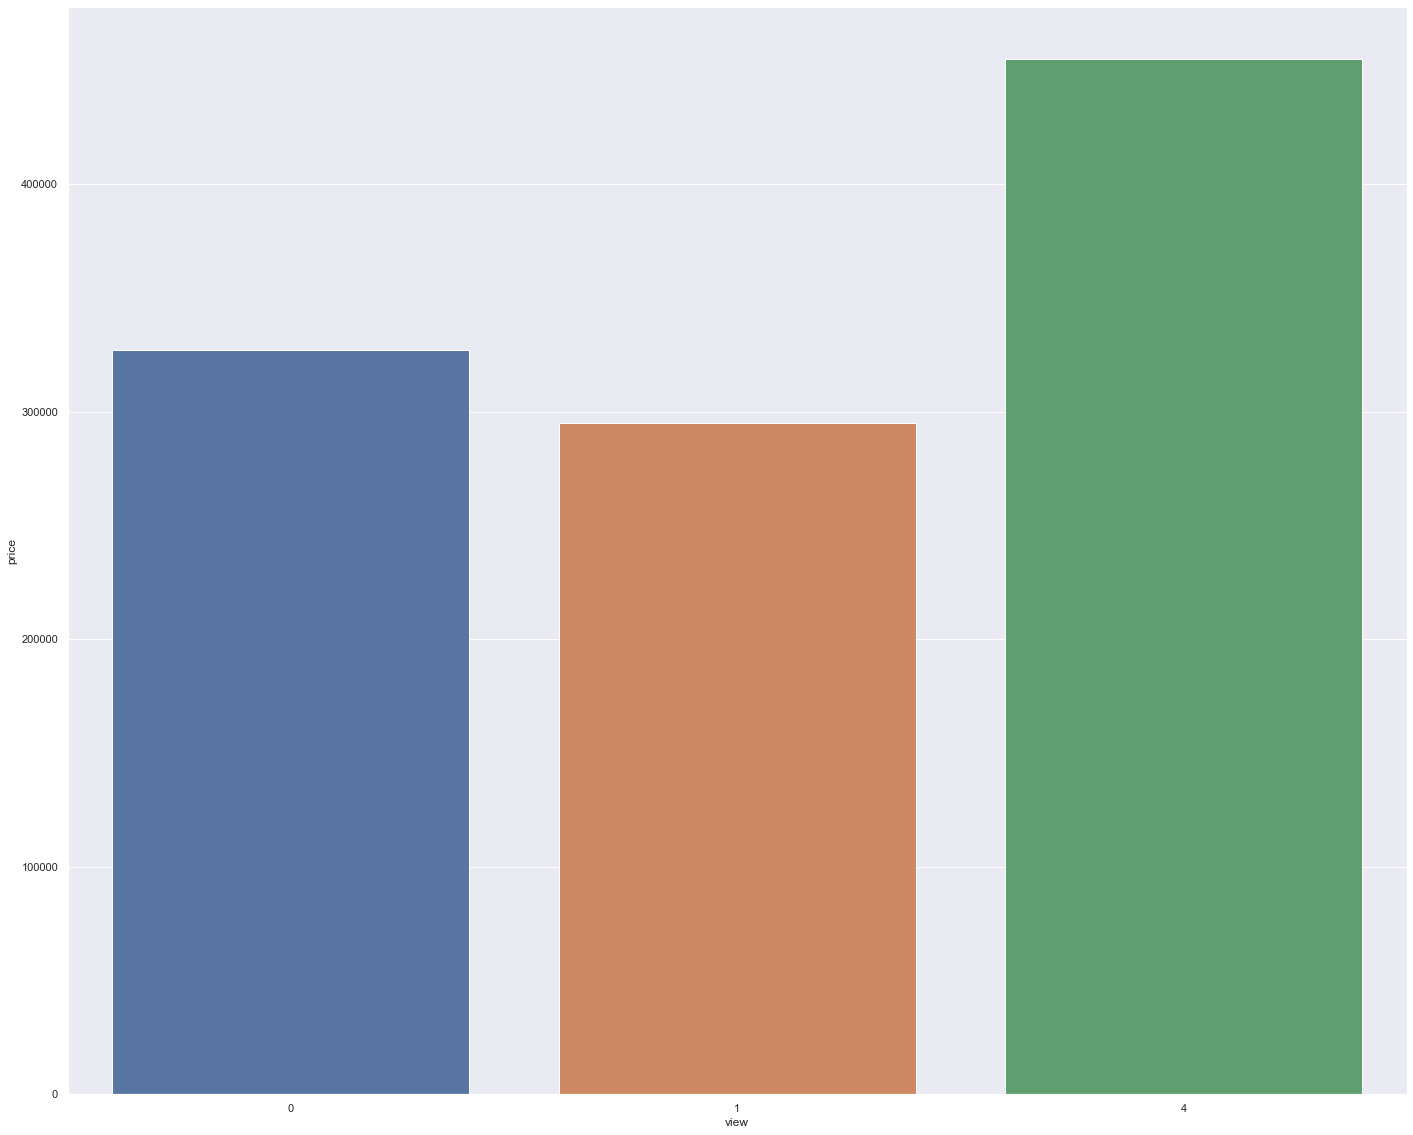

In [330]:
aux1 = df3[df3['condition'] == 1]
aux1 = aux1[['view', 'price']].groupby('view').mean().reset_index()
sns.barplot(x='view', y='price', data=aux1)

## 3.3 Resumo das Hipoteses

In [342]:
headers = ['Hipoteses', 'Conclusão', 'Relevância']

tab = [['H1', 'Verdadeira', 'Média'],
      ['H2', 'Verdadeira', 'Média'],
      ['H3', 'Verdadeira', 'Alta'],
      ['H4', 'Falsa', 'Baixa'],
      ['H5', 'Falsa', 'Média'],
      ['H6', 'Verdadeira', 'Baixa'],
      ['H7', 'Falsa', 'Baixa']]
print( tabulate( tab, headers=headers, showindex="always"))

    Hipoteses    Conclusão    Relevância
--  -----------  -----------  ------------
 0  H1           Verdadeira   Média
 1  H2           Verdadeira   Média
 2  H3           Verdadeira   Alta
 3  H4           Falsa        Baixa
 4  H5           Falsa        Média
 5  H6           Verdadeira   Baixa
 6  H7           Falsa        Baixa


In [261]:
## Iterative Map

df = df4.copy()

style= {'description_width': 'initial'}

# iterative buttons
price_limit = widgets.IntSlider(
                value = int(df['price'].mean()),
                min = df['price'].min(),
                max = df['price'].max(), 
                step = 1,
                description = 'Maximum Price',
                disable = False,
                style = style
)

waterfront_bar =  widgets.Dropdown(
                options = df['is_waterfront'].unique().tolist(),
                value = 'yes',
                description = 'Water View',
                disable = False
)

status_bar =  widgets.Dropdown(
                options = df['status'].unique().tolist(),
                value = 'buy',
                description = 'Status',
                disable = False
)

bathroom_limit = widgets.IntSlider(
                value = int(df['bathrooms'].mean()),
                min = df['bathrooms'].min(),
                max = df['bathrooms'].max(), 
                step = 1,
                description = 'Minimum Bathroom',
                disable = False,
                style = style)

basement_limit = widgets.IntSlider(
                value = int(df['sqft_basement'].mean()),
                min = df['sqft_basement'].min(),
                max = df['sqft_basement'].max(), 
                step = 1,
                description = 'Minimum Basement values',
                disable = False,
                style = style)

floors_limit = widgets.IntSlider(
                value = int(df['floors'].mean()),
                min = df['floors'].min(),
                max = df['floors'].max(), 
                step = 1,
                description = 'Minimum Floors',
                disable = False,
                style = style)

def update_map(df, status, waterfront, limit, bathroom_limit, basement_limit, floors_limit) :
    df = df[(df['price'] <= limit) & 
            (df['is_waterfront'] == waterfront) & 
            (df['bathrooms'] > bathroom_limit)  &
            (df['sqft_basement'] < basement_limit) &
            (df['floors'] < floors_limit) &
            (df['status'] == status)][['id', 'lat', 'long', 'price', 'level', 'bathrooms', 'sqft_basement', 'floors', 'status']].copy()
    
    fig = px.scatter_mapbox(df,
                           lat='lat',
                           lon='long',
                           color='level',
                           size='price',
                           color_continuous_scale= px.colors.cyclical.IceFire,
                           size_max=15,
                           zoom=10)
    
    fig.update_layout( mapbox_style='open-street-map' )
    fig.update_layout( height= 600,  margin={'r':0, 't':0, 'l':0, 'b':0})
    fig.show()   

widgets.interactive(update_map, df=fixed(df), 
                    limit = price_limit,
                    status = status_bar,
                    waterfront = waterfront_bar, 
                    bathroom_limit = bathroom_limit,
                    floors_limit = floors_limit,
                    basement_limit = basement_limit
                   )

interactive(children=(Dropdown(description='Status', options=('buy', 'not_buy'), value='buy'), Dropdown(descri…

# Business Answers